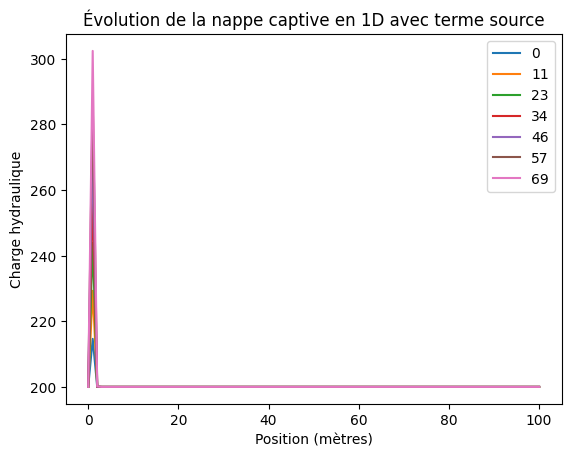

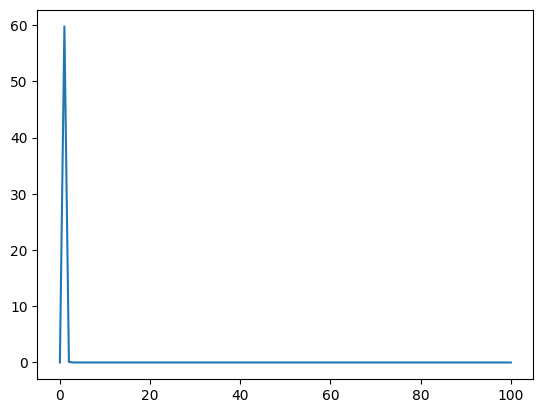

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du problème
L = 100  # Longueur du domaine en mètres
e= 200.0
K = 4.35e-7
S = 2.92e-3
T = 3.18e-5 # Transmissivité
dx = 1  # Espacement entre les points de la grille en mètres
dt = 10.0  # Pas de temps en secondes
q = 1265/86400    # Terme source (débit) en mètres cubes par seconde

# Nombre total de points sur la grille
num_points = int(L / dx) + 1

# Conditions initiales
h = np.zeros(num_points, dtype=np.float64)
h_0 = 200.0
h[:] = h_0  # Condition initiale avec une élévation au milieu de la nappe

# Nombre total d'itérations dans le temps
plt.figure()
for num_iteration in np.arange(0,86400*7,100000):
#num_iterations = 100
    # Schéma de différences finies
    for n in range(num_iterations):
        h_new = np.copy(h)
        for i in range(1, num_points - 1):
            # Ajout du terme source en x=0
            if i == 1:
                h_new[i] = h[i] + ((K) * (h[i + 1] - h[i]) / dx**2) * dt + (q * dt)
            else:
                h_new[i] = h[i] + ((K) * (h[i - 1] - 2 * h[i] + h[i + 1]) / dx**2) * dt
        h = np.copy(h_new)
    
    # Tracé du résultat
    x = np.linspace(0, L, num_points)
    plt.plot(x, h, label=str(int(num_iteration*dt/86400)))
    plt.title('Évolution de la nappe captive en 1D avec terme source')
    plt.xlabel('Position (mètres)')
    plt.ylabel('Charge hydraulique')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, (h - h_0)*S*e)
plt.show()